In [1]:
!pip install tensorflow==2.9.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.1 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.9.1


# Import needed modules

In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
# warnings.filterwarnings("ignore")

# print ('modules loaded')

2024-08-21 06:05:03.669673: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 06:05:03.669777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 06:05:03.796465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preprocessing

In [3]:
# Generate train data paths with labels
train_data_dir = "/kaggle/input/teeth-dataset/Teeth DataSet/Teeth_Dataset/Training"
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
# print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)
train_df

,filepaths,labels
0,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
1,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
2,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
3,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
4,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
...,...,...
3082,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
3083,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
3084,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
3085,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP


In [4]:
# Generate valid data paths with labels
valid_data_dir = "/kaggle/input/teeth-dataset/Teeth DataSet/Teeth_Dataset/Validation"
filepaths = []
labels = []

folds = os.listdir(valid_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(valid_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
# print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)
valid_df

,filepaths,labels
0,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
1,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
2,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
3,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
4,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
...,...,...
1023,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1024,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1025,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1026,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP


In [5]:
# Generate test data paths with labels
test_data_dir = "/kaggle/input/teeth-dataset/Teeth DataSet/Teeth_Dataset/Testing"
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)
# print(labels)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)
test_df

,filepaths,labels
0,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
1,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
2,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
3,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
4,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OC
...,...,...
1023,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1024,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1025,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP
1026,/kaggle/input/teeth-dataset/Teeth DataSet/Teet...,OLP


In [6]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


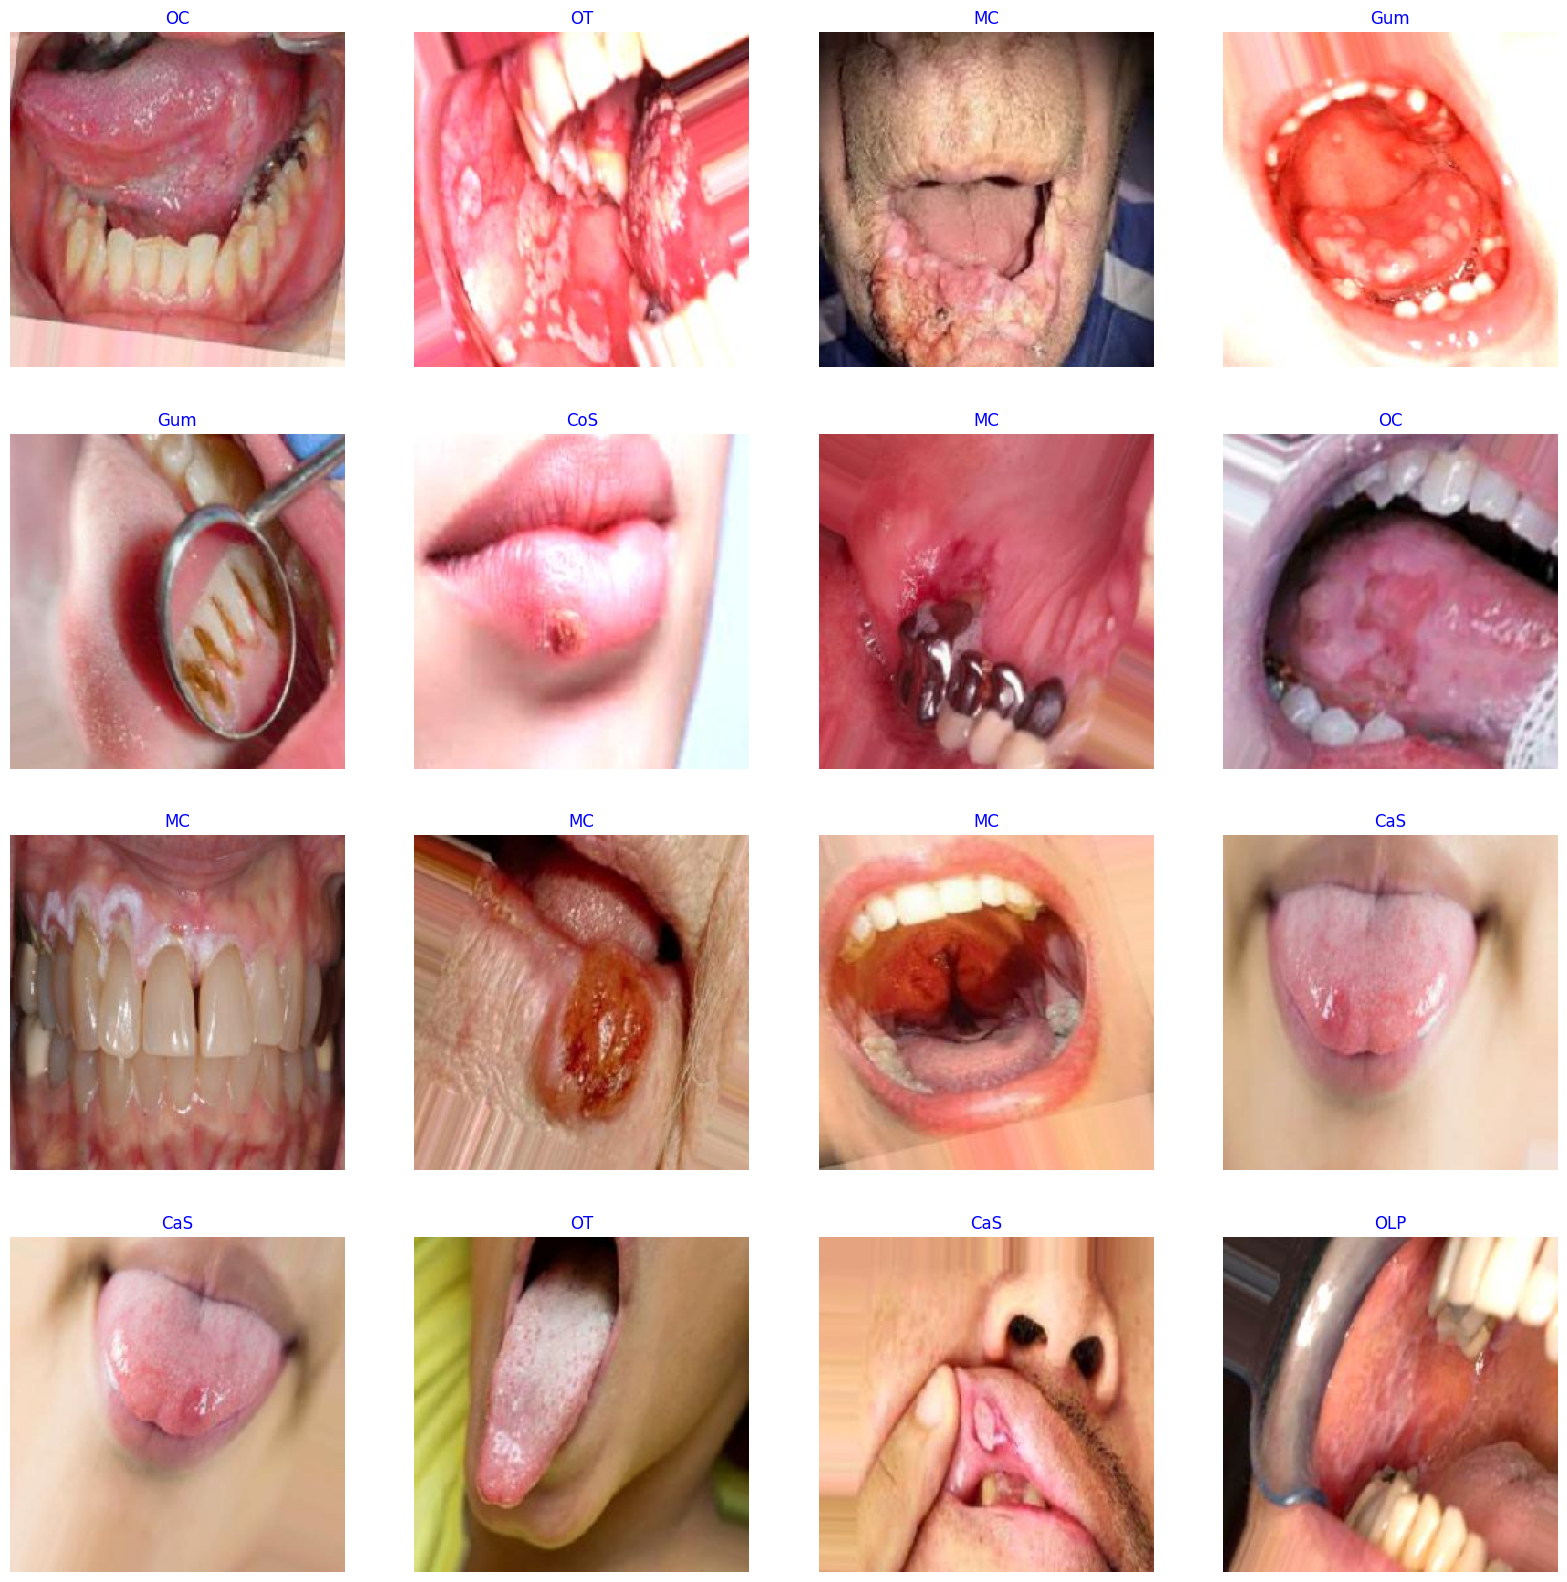

In [7]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

# calculate number of displayed samples
length = len(labels)        # length of batch size

plt.figure(figsize= (20, 20))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model Structure

In [8]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(3, 3),padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(265, activation='relu'),
    Dense(64, activation='relu'),
    Dense(class_count, activation='softmax')  # Adjust the number of units to match the number of classes
])
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'],) 

model.summary() 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 265)            │     6,648,585 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,380,752 (81.56 MB)

 Trainable params: 21,380,752 (81.56 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
Epochs = 25

history = model.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)
warnings.filterwarnings("ignore")

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-21 06:05:26.476437: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.89842, expected 3.37692
2024-08-21 06:05:26.476499: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.13412, expected 2.61262
2024-08-21 06:05:26.476508: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.08377, expected 2.56227
2024-08-21 06:05:26.476516: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14: 4.1021, expected 3.5806
2024-08-21 06:05:26.476524: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1

  1/193 ━━━━━━━━━━━━━━━━━━━━ 1:23:12 26s/step - accuracy: 0.1250 - loss: 4.0198

I0000 00:00:1724220346.728043      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724220346.755004      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


192/193 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1574 - loss: 76.3256

2024-08-21 06:06:07.863716: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.00564, expected 3.36194
2024-08-21 06:06:07.863777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.21235, expected 4.56865
2024-08-21 06:06:07.863786: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 10: 5.39965, expected 4.75595
2024-08-21 06:06:07.863794: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 5.25668, expected 4.61298
2024-08-21 06:06:07.863802: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 3.55266, expected 2.90896
2024-08-21 06:06:07.863810: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 4.84224, expected 4.19854
2024-08-21 06:06:07.863817: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 4.23174, expected 3.58804
2024-08-21 06:06:07.863825: E external/local_xla/x

193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.1574 - loss: 76.0195

W0000 00:00:1724220386.940528      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-08-21 06:06:32.019067: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.46848, expected 3.68847
2024-08-21 06:06:32.019131: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.72762, expected 5.94762
2024-08-21 06:06:32.019141: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.00592, expected 5.22591
2024-08-21 06:06:32.019150: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.42362, expected 5.64362
2024-08-21 06:06:32.019158: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 5.34585, expected 4.56585
2024-08-21 06:06:32.019166: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 5.68756, expected 4.90755
2024-08-21 06:06:32.019174: E external/local_xla/xla/service/gpu/

193/193 ━━━━━━━━━━━━━━━━━━━━ 75s 254ms/step - accuracy: 0.1575 - loss: 75.7165 - val_accuracy: 0.1556 - val_loss: 2.1447
Epoch 2/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.1983 - loss: 1.9260 - val_accuracy: 0.2208 - val_loss: 2.1049
Epoch 3/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.2835 - loss: 1.8273 - val_accuracy: 0.3609 - val_loss: 2.0084
Epoch 4/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.3657 - loss: 1.6748 - val_accuracy: 0.4202 - val_loss: 2.3381
Epoch 5/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.4553 - loss: 1.4689 - val_accuracy: 0.4767 - val_loss: 1.8397
Epoch 6/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.5437 - loss: 1.2410 - val_accuracy: 0.4951 - val_loss: 1.9332
Epoch 7/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.6467 - loss: 0.9833 - val_accuracy: 0.5681 - val_loss: 2.0089
Epoch 8/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.7346 - loss: 0.7153 - va

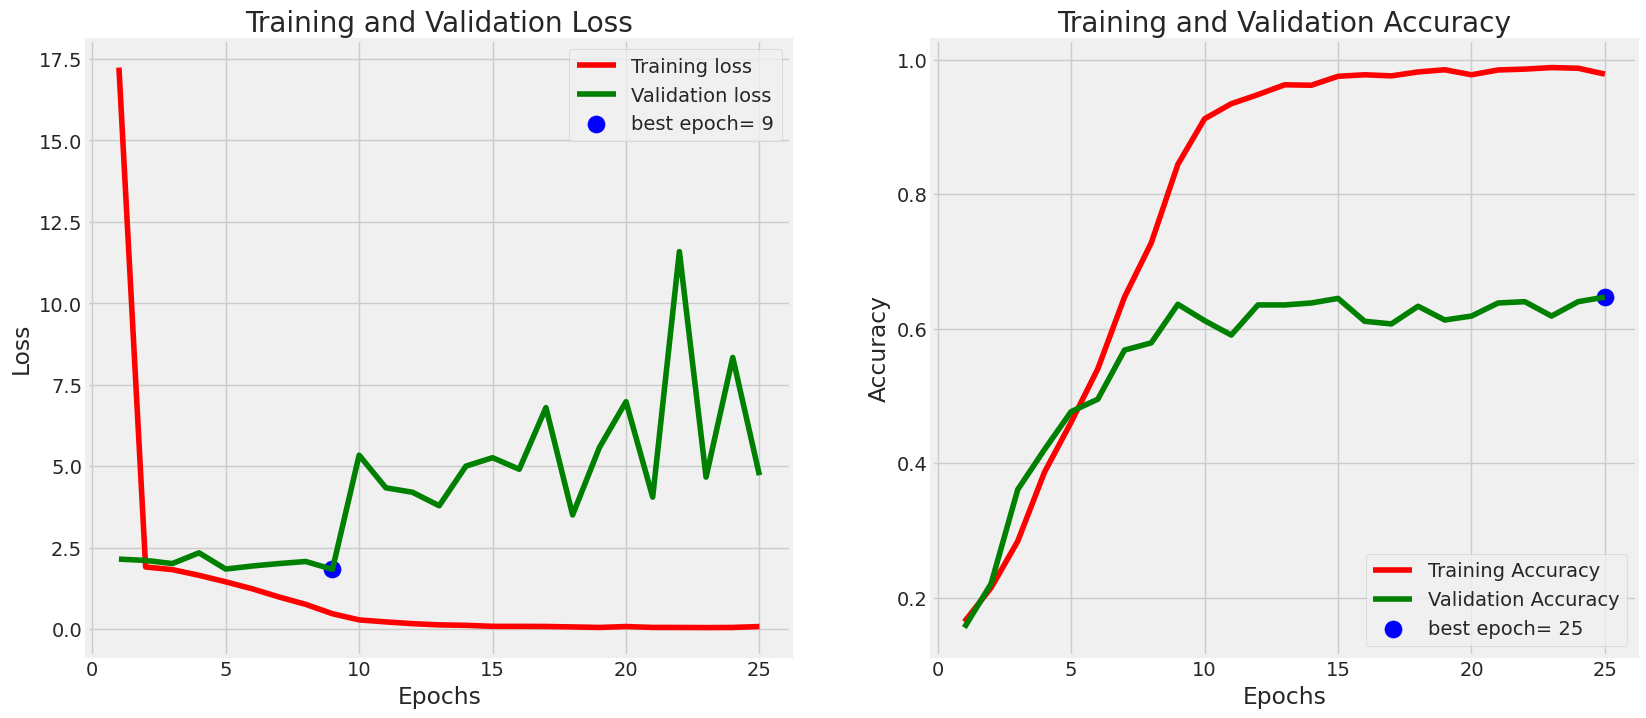

In [10]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [11]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

257/257 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9909 - loss: 0.0334
257/257 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6487 - loss: 5.5137 
257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6800 - loss: 1.8141 
Train Loss:  0.03423814848065376
Train Accuracy:  0.9902818202972412
--------------------
Validation Loss:  6.652183532714844
Validation Accuracy:  0.6468871831893921
--------------------
Test Loss:  1.7435935735702515
Test Accuracy:  0.6877431869506836


# Get Predictions

In [12]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

 7/65 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step

W0000 00:00:1724220958.789911      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step


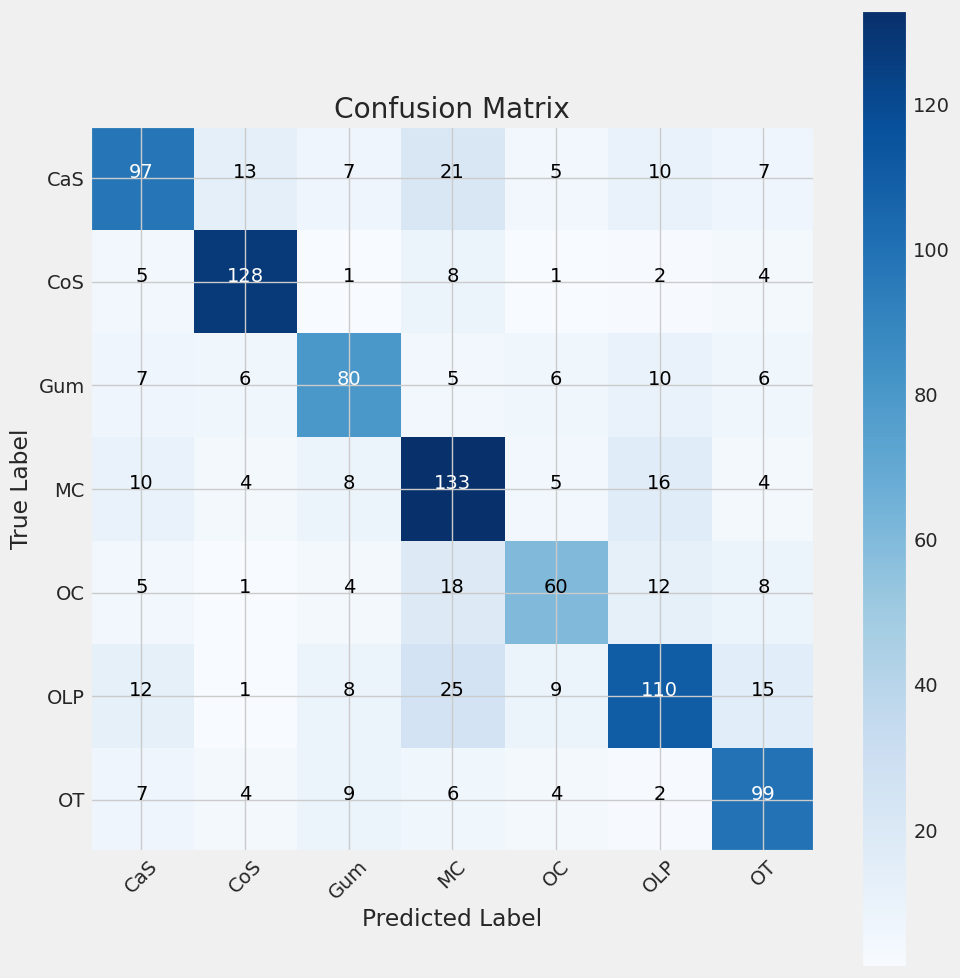

In [13]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [14]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

         CaS       0.68      0.61      0.64       160
         CoS       0.82      0.86      0.84       149
         Gum       0.68      0.67      0.68       120
          MC       0.62      0.74      0.67       180
          OC       0.67      0.56      0.61       108
         OLP       0.68      0.61      0.64       180
          OT       0.69      0.76      0.72       131

    accuracy                           0.69      1028
   macro avg       0.69      0.68      0.69      1028
weighted avg       0.69      0.69      0.69      1028



# Save model

In [15]:
model.save('Teeth Classification1.h5')

In [16]:
loaded_model = tf.keras.models.load_model("/kaggle/working/Teeth Classification1.h5", compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])